In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [2]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)

#### <font color='darkorange'> Remove baseline trials

In [3]:
below15 = below15[(below15['stim_condition']!=-1)]
below15['stim_condition'].unique()

array([1, 3, 0], dtype=int64)

#### <font color = 'darkorange'> Subdivision by outcome

In [4]:
errors=below15[below15['outcome']==0]
errors.groupby(['group', 'stim_condition'])['run_nr'].count()

group  stim_condition
CTRL   0                 174
       1                 152
       3                 202
NPHR   0                 215
       1                 204
       3                 256
Name: run_nr, dtype: int64

In [5]:
corrects=below15[below15['outcome']==1]
corrects.groupby(['group', 'stim_condition'])['run_nr'].count()

group  stim_condition
CTRL   0                 780
       1                 656
       3                 735
NPHR   0                 981
       1                 988
       3                 908
Name: run_nr, dtype: int64

#### <font color='darkorange'> Time distributions subdivided by outcome

<Figure size 1800x1200 with 0 Axes>

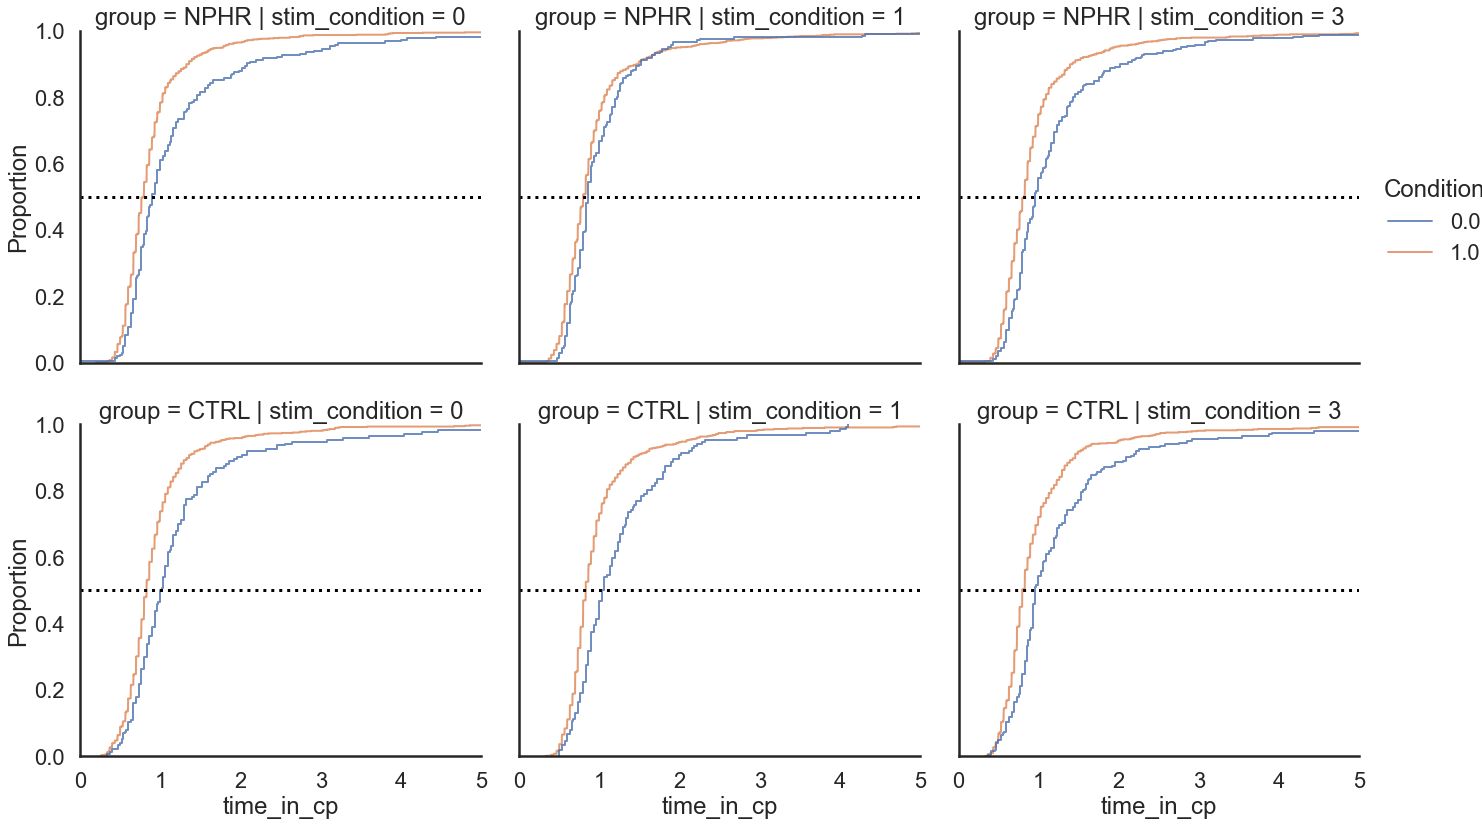

In [6]:
sns.set(style='white', context='poster')
plt.figure(dpi=300)

g = sns.displot(
        kind='ecdf', data=below15, col='stim_condition', 
        row='group', x='time_in_cp', stat='proportion',
        hue='outcome', linewidth=2, alpha=.8, height=6, aspect=1.1
)
for ax in g.axes.flatten():  
    ax.axhline(0.5,color='black', linestyle='dotted') 
#Legend 
g._legend.set(bbox_to_anchor=(.98,.7), title='Condition')
g.set(xlim=[0,5])
g.tight_layout()
sns.despine()

#### <font color='darkorange'> Cumulative latency distributions  of error trials within group

<Figure size 1800x1200 with 0 Axes>

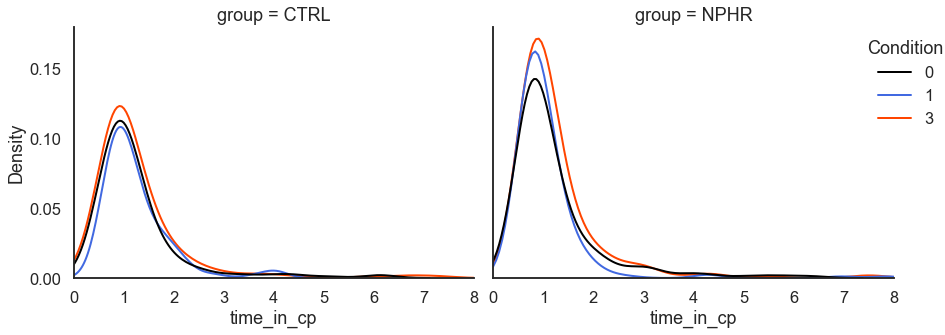

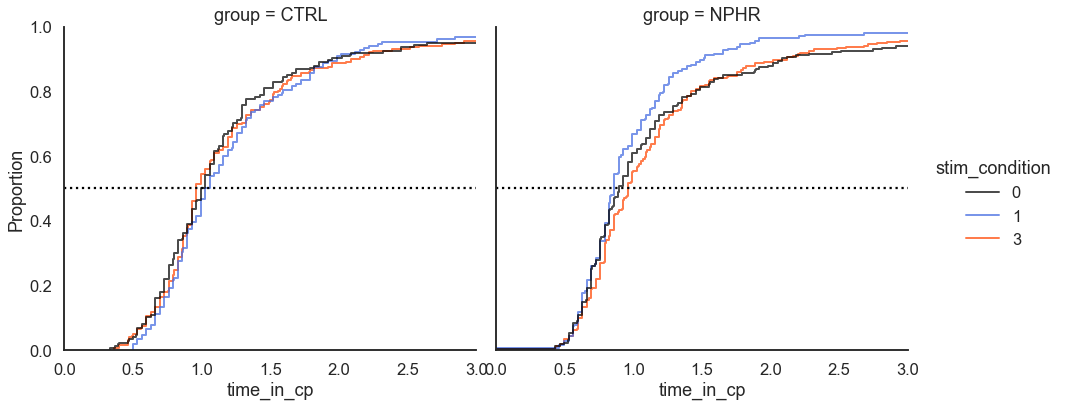

In [9]:
g = plot_latency_distributions_within_group(
    errors, 
    'kde',
    'time_in_cp',
    ['black', 'royalblue','orangered'])
g.set(xlim=(0,8))

g = sns.displot(
            kind='ecdf', data=errors, 
            col='group', col_order=['CTRL', 'NPHR'],
            x='time_in_cp', 
            hue='stim_condition',  
            palette=['black','royalblue', 'orangered'],
            alpha=.7, linewidth=2,
            height=6, aspect=1.1,
)
g.set(xlim=[0,3])
for ax in g.axes.flatten():  
    ax.axhline(0.5,color='black', linestyle='dotted')
    #ax.set(xlabel='Time (s)', xlim=(0,3), xticks=range(0,3,1), xticklabels=range(0,3,1), title=titles[i])
   

#### <font color='darkorange'> Inference testing comparing the latency distributions of error trials within groups

In [10]:
inference_testing_kruskal_within_group(errors, 'time_in_cp')

,group,h,p
0,CTRL,1.615939,0.445762
1,NPHR,8.283346,0.015896


In [11]:
ctrl_none_errors = errors[(errors['stim_condition']==0) & (errors['group']=='CTRL')]
ctrl_sample_errors = errors[(errors['stim_condition']==1) & (errors['group']=='CTRL')]
ctrl_test_errors = errors[(errors['stim_condition']==3) & (errors['group']=='CTRL')]
nphr_none_errors = errors[(errors['stim_condition']==0) & (errors['group']=='NPHR')]
nphr_sample_errors = errors[(errors['stim_condition']==1) & (errors['group']=='NPHR')]
nphr_test_errors = errors[(errors['stim_condition']==3) & (errors['group']=='NPHR')]

In [13]:

a = [ctrl_none_errors, ctrl_none_errors, nphr_none_errors, nphr_none_errors, nphr_sample_errors]
b = [ctrl_sample_errors, ctrl_test_errors, nphr_sample_errors, nphr_test_errors, nphr_test_errors]
results = inference_testing_mannwhitneyu(a,b,'time_in_cp')
#Alpha with bonferroni correction = 0.05/2 = 0.025
results

,a_group,b_group,a_condition,b_condition,a_outcome,b_outcome,u,p
0,CTRL,CTRL,0.0,1.0,0.0,0.0,12149.0,0.205625
1,CTRL,CTRL,0.0,3.0,0.0,0.0,17164.0,0.696763
2,NPHR,NPHR,0.0,1.0,0.0,0.0,23737.5,0.144718
3,NPHR,NPHR,0.0,3.0,0.0,0.0,25692.5,0.214345
4,NPHR,NPHR,1.0,3.0,0.0,0.0,21948.5,0.003292
